In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('sipall.csv')

In [5]:
#PCAP Data File 1
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,200.57.7.195,200.57.7.204,SIP/SDP,740,Request: INVITE sip:francisco@bestel.com:55060 |
1,2,0.007889,200.57.7.204,200.57.7.195,SIP,503,Status: 100 Trying |
2,3,0.047524,200.57.7.204,200.57.7.195,SIP,504,Status: 180 Ringing |
3,4,0.049780,200.57.7.206,200.57.7.197,TCP,54,1219 > 23 [ACK] Seq=1 Ack=1 Win=17465 Len=0
4,5,0.050802,200.57.7.197,200.57.7.206,TELNET,637,Telnet Data ...
...,...,...,...,...,...,...,...
4264,4265,34.890149,200.57.7.204,200.57.7.194,HTTP,214,POST /cems/applets/serviceRouter HTTP/1.1 (ap...
4265,4266,34.890418,200.57.7.194,200.57.7.204,HTTP,79,HTTP/1.1 100 Continue
4266,4267,34.893607,200.57.7.194,200.57.7.197,SNMP,211,get-request 1.3.6.1.4.1.2858.100.40.3.1.0 1.3....
4267,4268,34.908251,200.57.7.199,200.57.7.196,UDP,214,4800 > 40378 Len=172


In [8]:
#No of Packets file1
df.shape[0]

4269

In [10]:
df1 = pd.read_csv('sip1.csv')

In [11]:
#PCAP Data File 2
df1

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.10.41,192.168.10.2,SIP,596,Request: REGISTER sip:192.168.10.2 (1 binding...
1,2,0.000692,192.168.10.2,192.168.10.41,SIP,610,Status: 401 Unauthorized |
2,3,0.005771,192.168.10.41,192.168.10.2,SIP,755,Request: REGISTER sip:192.168.10.2 (1 binding...
3,4,0.009246,192.168.10.2,192.168.10.41,SIP,625,Request: OPTIONS sip:10009@192.168.10.41:13434...
4,5,0.010308,192.168.10.2,192.168.10.41,SIP,654,Status: 200 OK (1 binding) |
...,...,...,...,...,...,...,...
1037,1038,32.400035,192.168.10.41,192.168.10.2,RTP,214,"PT=ITU-T G.711 PCMU, SSRC=0xBEE0F2ED, Seq=5307..."
1038,1039,32.401915,192.168.10.41,192.168.10.2,SIP/SDP,942,Status: 200 OK |
1039,1040,32.402662,192.168.10.2,192.168.10.41,SIP,442,Request: ACK sip:10009@192.168.10.41:13434 |
1040,1041,32.402739,192.168.10.2,192.168.10.41,SIP,480,Request: BYE sip:10009@192.168.10.41:13434 |


In [13]:
#No of Packets file2
df1.shape[0]

1042

In [6]:
#List only SIP Packets in File 1
sip = df[df['Protocol'] == 'SIP']
sip

,No.,Time,Source,Destination,Protocol,Length,Info
1,2,0.007889,200.57.7.204,200.57.7.195,SIP,503,Status: 100 Trying |
2,3,0.047524,200.57.7.204,200.57.7.195,SIP,504,Status: 180 Ringing |
151,152,4.056633,200.57.7.205,200.57.7.195,SIP,460,Request: REGISTER sip:Verso.com (1 binding) |
152,153,4.072335,200.57.7.195,200.57.7.205,SIP,514,Status: 200 OK (1 binding) |
516,517,8.524137,200.57.7.195,200.57.7.204,SIP,485,Request: ACK sip:francisco@200.57.7.204:5061 |
1723,1724,17.457029,200.57.7.204,200.57.7.195,SIP,479,Request: REGISTER sip:bestel.com (1 binding) |
1726,1727,17.473413,200.57.7.195,200.57.7.204,SIP,532,Status: 200 OK (1 binding) |
2910,2911,24.309202,200.57.7.205,200.57.7.195,SIP,460,Request: REGISTER sip:Verso.com (1 binding) |
2911,2912,24.324792,200.57.7.195,200.57.7.205,SIP,514,Status: 200 OK (1 binding) |
2964,2965,24.674680,200.57.7.204,200.57.7.195,SIP,530,Status: 100 Trying |


In [14]:
sip.shape

(11, 7)

In [16]:
#List only SIP Packets in File 1
sip1 = df1[df1['Protocol'] == 'SIP']
sip1

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,192.168.10.41,192.168.10.2,SIP,596,Request: REGISTER sip:192.168.10.2 (1 binding...
1,2,0.000692,192.168.10.2,192.168.10.41,SIP,610,Status: 401 Unauthorized |
2,3,0.005771,192.168.10.41,192.168.10.2,SIP,755,Request: REGISTER sip:192.168.10.2 (1 binding...
3,4,0.009246,192.168.10.2,192.168.10.41,SIP,625,Request: OPTIONS sip:10009@192.168.10.41:13434...
4,5,0.010308,192.168.10.2,192.168.10.41,SIP,654,Status: 200 OK (1 binding) |
5,6,0.017462,192.168.10.41,192.168.10.2,SIP,593,Status: 200 OK |
6,7,0.024945,192.168.10.41,192.168.10.2,SIP,600,Request: SUBSCRIBE sip:10009@192.168.10.2 |
7,8,0.028999,192.168.10.2,192.168.10.41,SIP,611,Status: 401 Unauthorized |
8,9,0.032569,192.168.10.41,192.168.10.2,SIP,664,Request: SUBSCRIBE sip:10008@192.168.10.2 |
9,10,0.033144,192.168.10.2,192.168.10.41,SIP,599,Status: 401 Unauthorized |


In [17]:
sip1.shape

(22, 7)

In [18]:
#List the SIP info fields wrt time
sip[['No.', 'Time', 'Info']]

,No.,Time,Info
1,2,0.007889,Status: 100 Trying |
2,3,0.047524,Status: 180 Ringing |
151,152,4.056633,Request: REGISTER sip:Verso.com (1 binding) |
152,153,4.072335,Status: 200 OK (1 binding) |
516,517,8.524137,Request: ACK sip:francisco@200.57.7.204:5061 |
1723,1724,17.457029,Request: REGISTER sip:bestel.com (1 binding) |
1726,1727,17.473413,Status: 200 OK (1 binding) |
2910,2911,24.309202,Request: REGISTER sip:Verso.com (1 binding) |
2911,2912,24.324792,Status: 200 OK (1 binding) |
2964,2965,24.674680,Status: 100 Trying |


In [19]:
#List the SIP info fields wrt time
sip1[['No.', 'Time', 'Info']]

,No.,Time,Info
0,1,0.000000,Request: REGISTER sip:192.168.10.2 (1 binding...
1,2,0.000692,Status: 401 Unauthorized |
2,3,0.005771,Request: REGISTER sip:192.168.10.2 (1 binding...
3,4,0.009246,Request: OPTIONS sip:10009@192.168.10.41:13434...
4,5,0.010308,Status: 200 OK (1 binding) |
5,6,0.017462,Status: 200 OK |
6,7,0.024945,Request: SUBSCRIBE sip:10009@192.168.10.2 |
7,8,0.028999,Status: 401 Unauthorized |
8,9,0.032569,Request: SUBSCRIBE sip:10008@192.168.10.2 |
9,10,0.033144,Status: 401 Unauthorized |


In [20]:
#Analysis 1 File 1
infos = sip['Info'].to_list()
time = sip['Time'].to_list()

print('Type Fields\n')
flags = []
for info in infos:
    flag = info.split(':')
    flags.append(flag[0])
    print(flag[0])

Type Fields

Status
Status
Request
Status
Request
Request
Status
Request
Status
Status
Status


In [22]:
#Analysis 1 File 2
infos1 = sip1['Info'].to_list()
time1 = sip1['Time'].to_list()

print('Type Fields\n')
flags1 = []
for info1 in infos1:
    flag1 = info1.split(':')
    flags1.append(flag1[0])
    print(flag1[0])

Type Fields

Request
Status
Request
Request
Status
Status
Request
Status
Request
Status
Request
Status
Request
Status
Status
Request
Status
Status
Request
Request
Request
Status


<AxesSubplot:>

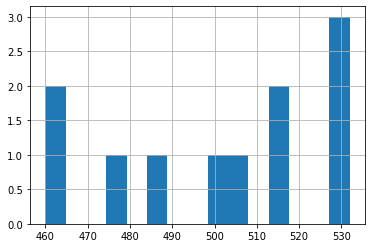

In [23]:
#Plot of Packets Length of SIP in File 1
%matplotlib inline
df[df['Protocol']=='SIP'].Length.hist(bins=15)

<AxesSubplot:>

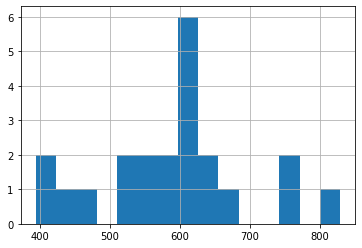

In [24]:
#Plot of Packets Length of SIP in File 1
%matplotlib inline
df1[df1['Protocol']=='SIP'].Length.hist(bins=15)

In [26]:
import matplotlib.pyplot as plt

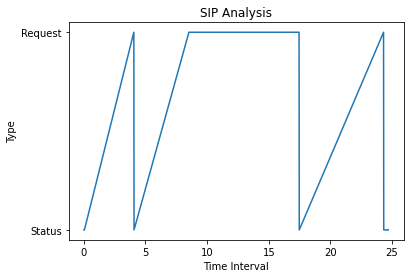

In [27]:
#Plot Type vs time interval for File1
plt.plot(time, flags)
plt.xlabel('Time Interval')
plt.ylabel('Type')
plt.title('SIP Analysis')
plt.show()

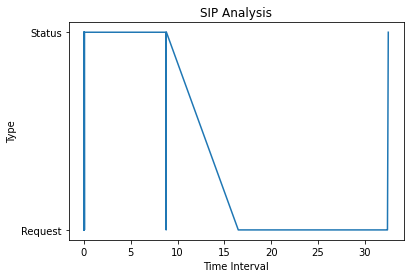

In [29]:
#Plot Type vs time interval for File2
plt.plot(time1, flags1)
plt.xlabel('Time Interval')
plt.ylabel('Type')
plt.title('SIP Analysis')
plt.show()